In [145]:
from numpy import *
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import math

### Wine dataset

In [146]:
from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y=True)
samples=mat(samples).astype(np.float64)
samples=samples.T
m,n=np.shape(samples)

### Standardization of Data

In [147]:
def center(samples):
    m,n=np.shape(samples)
    mean=samples.mean(axis=1)
    mu=mat([[0 for j in range(n)] for k in range(m)]).astype(float64)
    for i in range(m):
        mu[i,:]=mean[i]
    samples_centered=samples-mu
    return mat(samples_centered).astype(float64)

In [148]:
def normalize(samples):
    m,n=np.shape(samples)
    std=samples.std(axis=1)
    samples_normalized=mat([[0 for i in range(m)] for j in range(n)]).astype(np.float64)
    samples_normalized=samples/std
    return mat(samples_normalized).astype(float64)

In [149]:
def standardize(samples):
    m,n=np.shape(samples)
    samples_centered=center(samples)
    samples_standardized=normalize(samples_centered)
    for i in range(m):
        print("Raw ",i+1,": Mean=",samples_standardized[i,:].mean(),"Var=",np.var(samples_standardized[i,:]))
    return mat(samples_standardized).astype(float64)

In [150]:
def my_PCA(samples,k):
    U,Sigma,V=la.svd(samples)
    samples_PCA=U[:,0:k].T*samples_centered
    return samples_PCA.astype(float64)

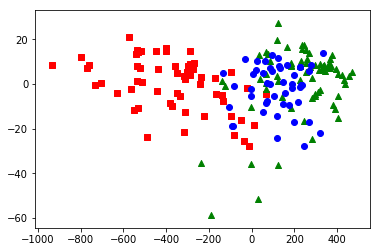

In [183]:
samples_centered=mat([[0 for j in range(n)] for i in range(m)])
samples_centered=center(samples)
samples_centered_PCA=my_PCA(samples_centered,2)
for i in range(n):
    if labels[i]==0:
        plt.scatter(samples_centered_PCA[0,i],samples_centered_PCA[1,i],color='r',marker='s')
    elif labels[i]==1:
        plt.scatter(samples_centered_PCA[0,i],samples_centered_PCA[1,i],color='g',marker='^')
    else:
        plt.scatter(samples_centered_PCA[0,i],samples_centered_PCA[1,i],color='b',marker='o')

Raw  1 : Mean= 7.903789982050553e-15 Var= 1.0
Raw  2 : Mean= 3.193450497798203e-16 Var= 1.0000000000000002
Raw  3 : Mean= -4.0679070598906016e-15 Var= 1.0000000000000002
Raw  4 : Mean= -3.991813122247754e-17 Var= 1.0
Raw  5 : Mean= -3.991813122247754e-17 Var= 1.0
Raw  6 : Mean= 0.0 Var= 0.9999999999999999
Raw  7 : Mean= 9.979532805619385e-16 Var= 1.0
Raw  8 : Mean= -5.588538371146855e-16 Var= 1.0
Raw  9 : Mean= -1.6965205769552954e-15 Var= 1.0000000000000002
Raw  10 : Mean= -3.4429388179386877e-16 Var= 1.0
Raw  11 : Mean= 1.6765615113440566e-15 Var= 1.0
Raw  12 : Mean= 2.1954972172362645e-15 Var= 1.0
Raw  13 : Mean= -1.5967252488991015e-16 Var= 1.0


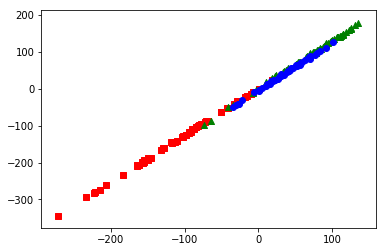

In [184]:
samples_standardized=mat([[0 for j in range(n)] for i in range(m)])
samples_standardized=standardize(samples)
samples_standardized_PCA=my_PCA(samples_standardized,2)
for i in range(n):
    if labels[i]==0:
        plt.scatter(samples_standardized_PCA[0,i],samples_standardized_PCA[1,i],color='r',marker='s')
    elif labels[i]==1:
        plt.scatter(samples_standardized_PCA[0,i],samples_standardized_PCA[1,i],color='g',marker='^')
    else:
        plt.scatter(samples_standardized_PCA[0,i],samples_standardized_PCA[1,i],color='b',marker='o')

Standardized data should have better performance.

In [194]:
def NBClassifier_2D_3Classes(training_samples,training_labels):
    n=len(training_labels)
    count0=list(training_labels).count(0)
    count1=list(training_labels).count(1)
    count2=list(training_labels).count(2)
    samples_0=mat([[0 for i in range(count0)] for j in range(2)]).astype(np.float64)
    samples_1=mat([[0 for i in range(count1)] for j in range(2)]).astype(np.float64)
    samples_2=mat([[0 for i in range(count2)] for j in range(2)]).astype(np.float64)
    j=0
    k=0
    l=0
    for i in range(n):
        if training_labels[i]==0:
            samples_0[0,j]=training_samples[0,i]
            samples_0[1,j]=training_samples[1,i]
            j=j+1
        elif training_labels[i]==1:
            samples_1[0,k]=training_samples[0,i]
            samples_1[1,k]=training_samples[1,i]
            k=k+1
        else:
            samples_2[0,l]=training_samples[0,i]
            samples_2[1,l]=training_samples[1,i]
            l=l+1
    mean_0=samples_0.mean(axis=1)
    var_0=samples_0.var(axis=1)
    mean_1=samples_1.mean(axis=1)
    var_1=samples_1.var(axis=1)
    mean_2=samples_2.mean(axis=1)
    var_2=samples_2.var(axis=1)
    return [mean_0,var_0,mean_1,var_1,mean_2,var_2]

In [191]:
def Gaussian(x,mean,var):
    return 1/(math.sqrt(2*math.pi*var))*math.exp(-1/2*(x-mean)*(x-mean)/var)

In [192]:
def NBclassification_2D_3classes(mean_0,var_0,mean_1,var_1,mean_2,var_2,test_samples):
    m,n=np.shape(test_samples)
    derived_labels=[0 for i in range(n)]
    for i in range(n):
        Pr0=Gaussian(test_samples[0,i],mean_0[0],var_0[0])*Gaussian(test_samples[1,i],mean_0[1],var_0[1])
        Pr1=Gaussian(test_samples[0,i],mean_1[0],var_1[0])*Gaussian(test_samples[1,i],mean_1[1],var_1[1])
        Pr2=Gaussian(test_samples[0,i],mean_2[0],var_2[0])*Gaussian(test_samples[1,i],mean_2[1],var_2[1])
        if max(Pr0,Pr1,Pr2)==Pr0:
            derived_labels[i]=0
        elif max(Pr0,Pr1,Pr2)==Pr1:
            derived_labels[i]=1
        else:
            derived_labels[i]=2
    return derived_labels

In [246]:
def K_fold_CV_2D_3classes(samples,labels,k:int):
    m,n=np.shape(samples)
    samples_with_labels=mat([[0 for i in range(n)] for j in range(m+1)]).astype(np.float64)
    samples_with_labels[:m,:]=samples
    samples_with_labels[m,:]=labels
    a=n//k
    fold=[0 for i in range(k)]
    for i in range(k-1):
        fold[i]=samples_with_labels[:,i*a:(i+1)*a].astype(np.float64)
    fold[k-1]=samples_with_labels[:,(k-1)*a:].astype(np.float64)
    error_number=[0 for i in range(k)]
    accuracy=[0 for i in range(k)]
    
    for i in range(k):
        print("Run ",i+1,":")
        test_samples=fold[i].astype(np.float64)
        mi,ni=np.shape(fold[i])
        training_samples=mat([[0 for j in range(n-ni)] for i in range(m+1)]).astype(np.float64)
        sample_number=0
        for j in range(k):
            if j==i:
                continue
            mj,nj=np.shape(fold[j])
            training_samples[:,sample_number:sample_number+nj]=fold[j]
            sample_number=sample_number+nj
        mean_0,var_0,mean_1,var_1,mean_2,var_2=NBClassifier_2D_3Classes(training_samples[:m,:],training_samples[m,:].T)
        derived_labels=NBclassification_2D_3classes(mean_0,var_0,mean_1,var_1,mean_2,var_2,test_samples)
        for l in range(ni):
            if derived_labels[l]!=test_samples[m,l]:
                error_number[i]=error_number[i]+1
        accuracy[i]=1-error_number[i]/n
        print(error_number[i]," Errors,Accuracy",accuracy[i]*100,"%")
    
    print("\nOverall Performance:\nMean of Accuracy:",mean(accuracy)*100,"%\nVariance of Accuracy:",np.var(accuracy))

In [248]:
print("Case 1:Data Centered Only:\n")
K_fold_CV_2D_3classes(samples_centered_PCA,labels,5)
print("\n\nCase 2:Data Standardized:\n")
K_fold_CV_2D_3classes(samples_standardized_PCA,labels,5)

from sklearn.naive_bayes import GaussianNB
print("\n\nCase 3:Data Standardized with sklearn:\n")
m,n=np.shape(samples_standardized_PCA)
k=5
samples_with_labels=mat([[0 for i in range(n)] for j in range(m+1)]).astype(np.float64)
samples_with_labels[:m,:]=samples_standardized_PCA
samples_with_labels[m,:]=labels
a=n//k
fold=[0 for i in range(k)]
for i in range(k-1):
    fold[i]=samples_with_labels[:,i*a:(i+1)*a].astype(np.float64)
fold[k-1]=samples_with_labels[:,(k-1)*a:].astype(np.float64)
error_number=[0 for i in range(k)]
accuracy=[0 for i in range(k)]
    
for i in range(k):
    print("Run ",i+1,":")
    test_samples=fold[i].astype(np.float64)
    mi,ni=np.shape(fold[i])
    training_samples=mat([[0 for j in range(n-ni)] for i in range(m+1)]).astype(np.float64)
    sample_number=0
    for j in range(k):
        if j==i:
            continue
        mj,nj=np.shape(fold[j])
        training_samples[:,sample_number:sample_number+nj]=fold[j]
        sample_number=sample_number+nj
    clf = GaussianNB()
    clf.fit(array(training_samples[:m,:].T),array(training_samples[m,:].T))
    derived=array([0 for l in range(ni)])
    for l in range(ni):
        derived[l]=clf.predict(test_samples[:m,l])[0]
        if derived_labels[l]!=test_samples[m,l]:
            error_number[i]=error_number[i]+1
    accuracy[i]=1-error_number[i]/n
    print(error_number[i]," Errors,Accuracy",accuracy[i]*100,"%")
    
print("\nOverall Performance:\nMean of Accuracy:",mean(accuracy)*100,"%\nVariance of Accuracy:",np.var(accuracy))

Case 1:Data Centered Only:

Run  1 :
3  Errors,Accuracy 98.31460674157303 %
Run  2 :
7  Errors,Accuracy 96.06741573033707 %
Run  3 :
11  Errors,Accuracy 93.82022471910112 %
Run  4 :
6  Errors,Accuracy 96.62921348314607 %
Run  5 :
15  Errors,Accuracy 91.57303370786516 %

Overall Performance:
Mean of Accuracy: 95.28089887640449 %
Variance of Accuracy: 0.0005504355510667842


Case 2:Data Standardized:

Run  1 :
3  Errors,Accuracy 98.31460674157303 %
Run  2 :
8  Errors,Accuracy 95.50561797752809 %
Run  3 :
15  Errors,Accuracy 91.57303370786516 %
Run  4 :
8  Errors,Accuracy 95.50561797752809 %
Run  5 :
19  Errors,Accuracy 89.32584269662921 %

Overall Performance:
Mean of Accuracy: 94.04494382022473 %
Variance of Accuracy: 0.0010175482893574042


Case 3:Data Standardized with sklearn:

Run  1 :
3  Errors,Accuracy 98.31460674157303 %
Run  2 :
14  Errors,Accuracy 92.13483146067416 %
Run  3 :
35  Errors,Accuracy 80.33707865168539 %
Run  4 :
35  Errors,Accuracy 80.33707865168539 %
Run  5 :
35  E

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
